<div class="alert alert-info">
<h3><center>"BREAST CANCER COIMBRA"<center> </h3>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: Lia Anggraini</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011281722065</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK 5A</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>JURUSAN &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: SISTEM KOMPUTER</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : KECERDASAN BUATAN</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>DOSEN PENGAMPUH: Prof. Dr. Ir. Siti Nurmaini, M.T.</strong></h3>
</li>
</ul>
</div>

In [51]:
#main library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

from keras.optimizers import Adam
#sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-danger">
 <font size="3"><p align="justify">
    <strong>Berikut adalah daftar Modul yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    <strong>Numpy =</strong> Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks
</li> 
</ul>

<ul>
<li style="text-align: left;">
<strong>Pandas =</strong> Modul ini akan digunakan untuk Load Dataset, karena pandas lebih baik untuk load data dengan skala besar
</li>
</ul>
  
<ul>
<li style="text-align: left;">
<strong>Matplotlib =</strong> Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix, grafik akurasi, dll.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Seaborn =</strong> Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Sklearn =</strong> Modul ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Keras =</strong> Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Warning =</strong> Modul ini dikeluarkan dalam situasi di mana berguna untuk mengingatkan pengguna tentang beberapa kondisi dalam suatu program, di mana kondisi tersebut tidak menjamin menimbulkan pengecualian dan menghentikan program. Filter warning yang digunakan adalah action "Ignore".
</li>
</ul>


<div>

<div class="alert alert-info">
<h2> <center> Load Data dari Dataset Breast Cancer Coimbra

Link dataset Breast Cancer Coimbra : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [52]:
df = pd.read_csv("C:/Users/ASUS/Downloads/breastcancercoimbra.csv")

<div class="alert alert-danger">
 <font size="3"><p align="justify"><strong>Berikut merupakan spesifikasi dari dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 9 variabel yaitu : Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resitin, dan MCP.1.
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel yaitu : Classification, dengan 2 kondisi, yaitu 1 dan 2.
</li>
</ul>
    
<div>

In [53]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [55]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [56]:
df.shape

(116, 10)

In [57]:
# Bagi data ke Fitur dan Label

X = df.iloc[:,:9].values
Y = df.iloc[:,9].values - 1

In [58]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(X)
feature_scaled.shape

(116, 9)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


<div class="alert alert-danger">
 <font size="3"><p align="justify">Pada ANN ini terdapat 2 output : 
<ul>
<li style="text-align: left;">
    Control Healthy = kondisi saat ANN menetapkan bahwa pasien hanya mengontrol kesehatan, nilai yang di ambil adalah pada Variabel "Classification" dengan nilai 1 yang ada pada dataset.
</li> 
</ul>

<ul>
<li style="text-align: left;">
Patients = kondisi saat ANN menetapkan bahwa pasien mengidap penyakit kanker payudara, nilai yang di ambil adalah pada Variabel "Classification" dengan nilai 2 yang ada pada dataset.</h4>
</li>
</ul>
    
<div>

Text(0.5, 0, 'Classification')

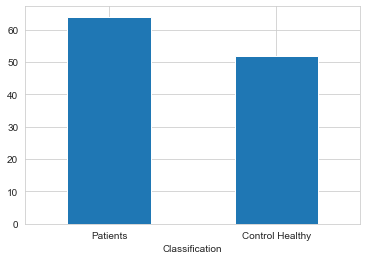

In [73]:
labels = ['Patients','Control Healthy']
classes = pd.value_counts(df['Classification'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), labels)
plt.xlabel("Classification")

<div class="alert alert-info">
<h2> <center> M O D E L

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<div class="alert alert-danger">
 <font size="3"><p align="justify">Pendeklarasian Variabel dengan ketentuan sebagai berikut : 

<ul>
<li style="text-align: left;">
x_train adalah variabel yang akan digunakan untuk data training X
</li>
</ul>

<ul>
<li style="text-align: left;">
x_test adalah variabel yang akan digunakan untuk data testing X
</li>
</ul>

<ul>
<li style="text-align: left;">
y_train adalah variabel yang akan digunakan untuk data training Y
</li>
</ul>

<ul>
<li style="text-align: left;">
y_test adalah variabel yang akan digunakan untuk data testing Y
</li>
</ul>

Pada codingan di atas digunakan modul train_test_split untuk membagi data yang akan digunakan untuk testing dan training, data untuk testing sebesar 20%, dan data untuk training sebesar 80%.
<ul>
<li style="text-align: left;">
Training set merupakan bagian dataset yang dilatih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma Machine Learning lainnya sesuai tujuannya masing-masing.
</li>
</ul>

<ul>
<li style="text-align: left;">
Testing set merupakan bagian dataset yang di tes untuk melihat keakuratannya atau dengan kata lain performanya.
</li>
</ul>
<div>

In [37]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([ 6, 18], dtype=int64))

<div class="alert alert-danger">
 <font size="3"><p align="justify">Model Sekuensial merupakan tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

<div class="alert alert-danger">
 <font size="3"><p align="justify"><strong>Pada Model yang saya buat terdapat beberapa layer yaitu :</strong>
<ul>
<li style="text-align: left;">
    LAYER INPUT : Pada Layer Input terdapat 9 jenis nilai yang diambil dari dataset Liver Disorders.
</li> 
</ul>

<ul>
<li style="text-align: left;">
    HIDDEN LAYER: Pada model terdapat satu Hidden Layer yang memiliki neuron sebanyak 100.
</li>
</ul>

<ul>
<li style="text-align: left;">
   OUTPUT LAYER: Pada Layer Output terdapat 2 nilai yang dihasilkan yaitu 1 dan 2.
</li>
</ul>
   
<div>

In [38]:
model = Sequential()
model.add(Dense(units= 100, input_dim =9 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

<div class="alert alert-danger">
<h3>Penjelasan fungsi aktivasi yang digunakan : </h3>
<ul>
<li style="text-align: left;">
    <h4><b>Relu merupakan fungsi aktivasi yang digunakan pada layer ini.</h4></b>
</li> 
</ul>

<ul>
<li style="text-align: left;">
<h4>Sigmoid = Merupakan fungsi aktivasi yang digunakan pada layer ini, fungsi aktivasi sigmoid memberikan output dengan rentang nilai antara 0 s/d 1.</h4>
</li>
</ul>
    
<div>

In [39]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<div class="alert alert-danger">
<h3>Penjelasan coding yang digunakan di bawah : </h3>
<ul>
    
<ul>
<li style="text-align: left;">
<h4>Epoch merupakan kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)</h4>
</li>
</ul>
    

<ul>
<li style="text-align: left;">
<h4>Batch Size 16 = adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 16 bagian untuk memudahkan index pada saat pelatihan.
</li>
</ul>

<ul>
<li style="text-align: left;">
<h4>Validation Adalah ukuran data yang akan digunakan untuk testing dan training.
</li>
</ul>

In [40]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, 
                         epochs=100)

Train on 92 samples, validate on 24 samples
Epoch 1/100
92/92 [==============================] - 2s 18ms/step - loss: 7.5673 - acc: 0.4674 - val_loss: 0.8205 - val_acc: 0.7500
Epoch 2/100
92/92 [==============================] - 0s 947us/step - loss: 4.2358 - acc: 0.5109 - val_loss: 5.0032 - val_acc: 0.2500
Epoch 3/100
92/92 [==============================] - 0s 1ms/step - loss: 4.1178 - acc: 0.5326 - val_loss: 0.9829 - val_acc: 0.6667
Epoch 4/100
92/92 [==============================] - ETA: 0s - loss: 4.1827 - acc: 0.562 - 0s 1ms/step - loss: 1.9572 - acc: 0.5978 - val_loss: 1.0599 - val_acc: 0.6667
Epoch 5/100
92/92 [==============================] - 0s 1ms/step - loss: 1.3896 - acc: 0.5870 - val_loss: 1.4853 - val_acc: 0.4583
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 1.4770 - acc: 0.5870 - val_loss: 1.8559 - val_acc: 0.4167
Epoch 7/100
92/92 [==============================] - 0s 936us/step - loss: 1.6387 - acc: 0.5435 - val_loss: 1.4168 - val_acc: 0.4

92/92 [==============================] - 0s 2ms/step - loss: 0.4822 - acc: 0.8152 - val_loss: 0.9266 - val_acc: 0.7500
Epoch 63/100
92/92 [==============================] - 0s 958us/step - loss: 0.3715 - acc: 0.8587 - val_loss: 1.4264 - val_acc: 0.7083
Epoch 64/100
92/92 [==============================] - ETA: 0s - loss: 0.6874 - acc: 0.703 - 0s 2ms/step - loss: 0.6413 - acc: 0.7065 - val_loss: 1.3411 - val_acc: 0.7083
Epoch 65/100
92/92 [==============================] - 0s 2ms/step - loss: 0.4573 - acc: 0.7935 - val_loss: 0.9996 - val_acc: 0.6250
Epoch 66/100
92/92 [==============================] - 0s 561us/step - loss: 0.7276 - acc: 0.7283 - val_loss: 1.0592 - val_acc: 0.7083
Epoch 67/100
92/92 [==============================] - 0s 1ms/step - loss: 0.5857 - acc: 0.7283 - val_loss: 2.0366 - val_acc: 0.5833
Epoch 68/100
92/92 [==============================] - 0s 1ms/step - loss: 0.9498 - acc: 0.6848 - val_loss: 0.9364 - val_acc: 0.7917
Epoch 69/100
92/92 [===========================

<div class="alert alert-info">
<h2> <center> A K U R A S I

In [41]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

24/24 [==============================] - 0s 79us/step


[1.3707040548324585, 0.6666666865348816]

<div class="alert alert-info">
<h2> <center> PLOT AKURASI

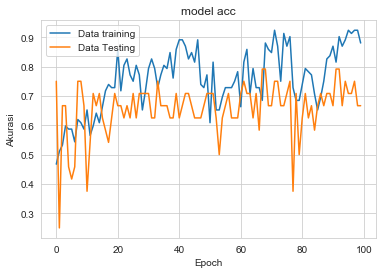

In [42]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('model acc')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

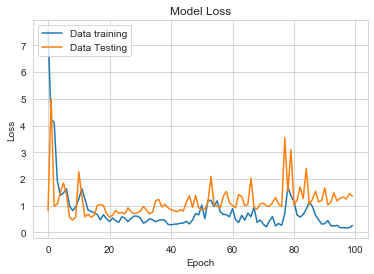

In [43]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

In [19]:
# INport Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
prediction = model.predict_classes(x_test)

In [20]:
y_test

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2], dtype=int64)

In [21]:
print (y_test[:10])
print (prediction[:10])

[2 1 2 2 2 2 2 2 1 1]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


<div class="alert alert-info">
<h2> <center> Confusion MATRIX

In [72]:
cm = confusion_matrix(y_test, prediction) 
print(cm)

[[ 0  6]
 [ 0 18]]


In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         6
           2       0.00      0.00      0.00        18

    accuracy                           0.25        24
   macro avg       0.12      0.50      0.20        24
weighted avg       0.06      0.25      0.10        24

